In [1]:
from standardInclude import *

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
path = "./data/Run_2D2/"
dataset = "Run 2-D2"
csv_files = [x for x in os.listdir(path) if "csv" in x]
names = [x.split("_")[len(x.split("_")) -1].split(".csv")[0] for x in csv_files]
print(csv_files)
print(names)
counter = 0

['run2d2_dqc_fix_ctags.csv', 'run2d2_dqc_fix_losses.csv', 'run2d2_dqc_fix_fillcuts.csv']
['ctags', 'losses', 'fillcuts']


In [3]:
dfs = {}
dfs_cut = {}
for i, file in enumerate(csv_files):
    dfi = pandas.read_csv(path+file, header=None)
    dfs[names[i]] = dfi
    print(names[i])
    print(dfi.head())
    print("***************")

ctags
       0  1  2    3  4
0  26025  0  0  0.0  0
1  26025  1  0  0.0  0
2  26025  2  0  0.0  0
3  26025  3  0  0.0  0
4  26025  4  0  0.0  0
***************
losses
       0  1    2
0  26025  0  0.0
1  26025  1  0.0
2  26025  2  0.0
3  26025  3  0.0
4  26025  4  0.0
***************
fillcuts
       0  1  2    3
0  26025  0  0  126
1  26025  1  0  128
2  26025  2  0  128
3  26025  3  0  128
4  26025  4  0  144
***************


ctags/t0Val >=  0.0035  and fills >  25  and ctags >  5000  and t0val >  4000000.0


/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


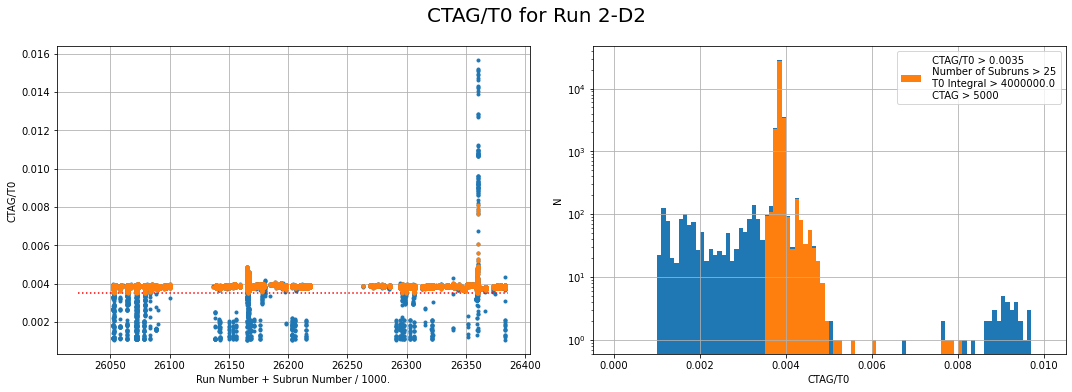

/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


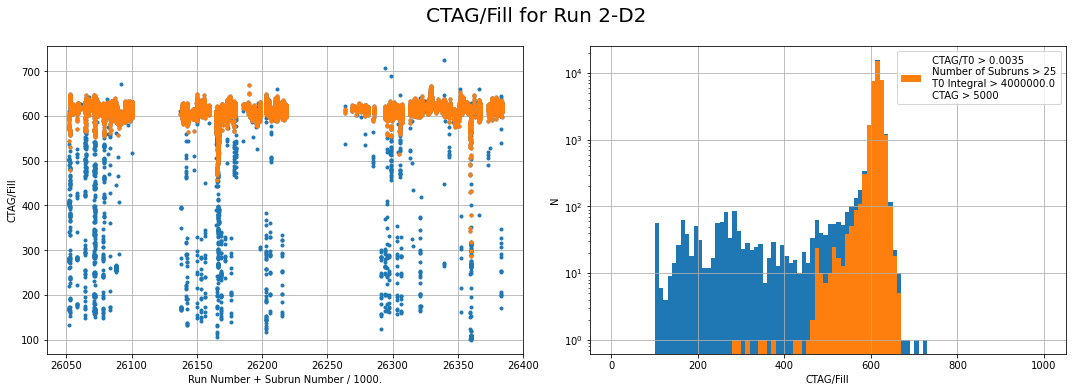

In [4]:
df = dfs['ctags']

ctagPerFillCut = 0.0035
nSubuncut = 25
t0_int_cut = 4e6
ctag_total_cut = 5000

print("ctags/t0Val >= ", ctagPerFillCut," and fills > ", nSubuncut," and ctags > ", ctag_total_cut," and t0val > ", t0_int_cut)

df_cut = df.loc[df[2]/df[3] > ctagPerFillCut].loc[df[4] > nSubuncut].loc[df[2] > ctag_total_cut].loc[df[3] > t0_int_cut]
dfs_cut['ctags'] = df_cut

#  run  | subrun | ctags |    t0val    | fills  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [ctagPerFillCut, ctagPerFillCut], ":", color='red')
ax[1].hist(df[2]/df[3],bins=100,range=(0,0.01))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,0.01),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/T0 for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/T0")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/T0")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_CTAG_over_T0.png", bbox_inches='tight')

plt.show()

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[4], ".")
ax[1].hist(df[2]/df[4],bins=100,range=(0,1000))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[4], ".")
ax[1].hist(df_cut[2]/df_cut[4],bins=100,range=(0,1000),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/Fill for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/Fill")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/Fill")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill.png", bbox_inches='tight')

plt.show()

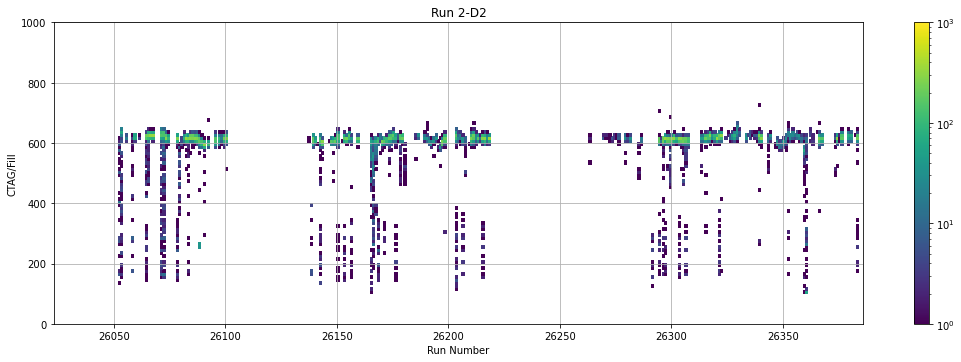

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2
plt.hist2d(df[0], df[2]/df[4], range=((runstart, runend), (0,1000)),bins=((runend-runstart),100),
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("CTAG/Fill")
plt.tight_layout()
plt.grid()
plt.title(dataset)
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill_hist.png", bbox_inches='tight')

plt.show()

fillFraction >= 0.2


/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


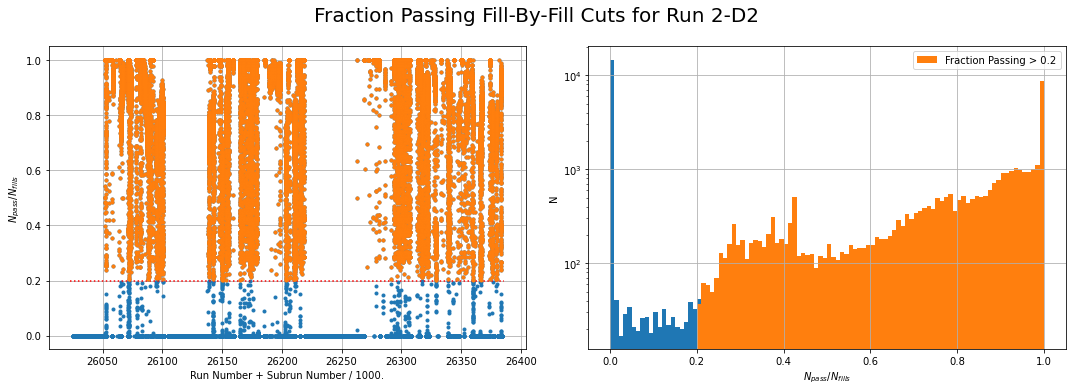

In [6]:
df = dfs['fillcuts']

fraction_passing = 0.2

print("fillFraction >=", fraction_passing)

df_cut = df.loc[df[2]/df[3] > fraction_passing]
dfs_cut['fillcuts'] = df_cut

#    run  | subrun | fills | fills   
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [fraction_passing, fraction_passing], ":", color='red')

ax[1].hist(df[2]/df[3],bins=100,range=(0,1))

ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,1),label=("Fraction Passing > "+str(fraction_passing)))
ax[1].legend()

ax[1].set_yscale("log")
plt.suptitle("Fraction Passing Fill-By-Fill Cuts for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel(r"$N_{pass}/N_{fills}$")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"$N_{pass}/N_{fills}$")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts.png", bbox_inches='tight')

plt.show()

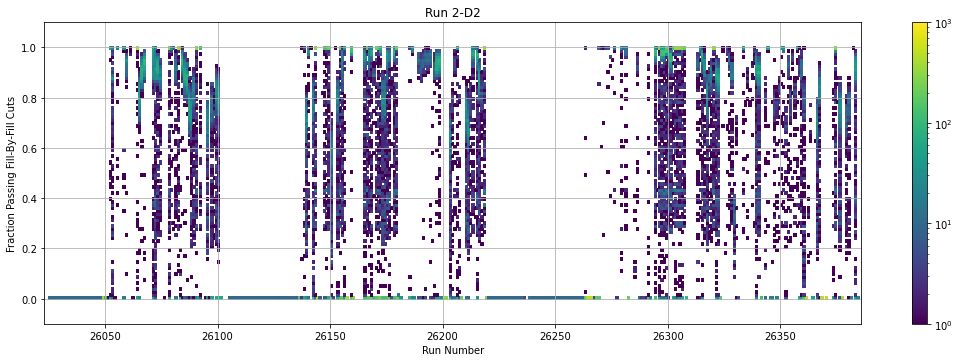

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2
plt.hist2d(df[0], df[2]/df[3], range=((runstart, runend), (-0.1,1.1)),bins=((runend-runstart),100),
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Fraction Passing Fill-By-Fill Cuts")
plt.tight_layout()
plt.grid()
plt.title(dataset)
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts_hist.png", bbox_inches='tight')

plt.show()

lossRatio <=  0.008


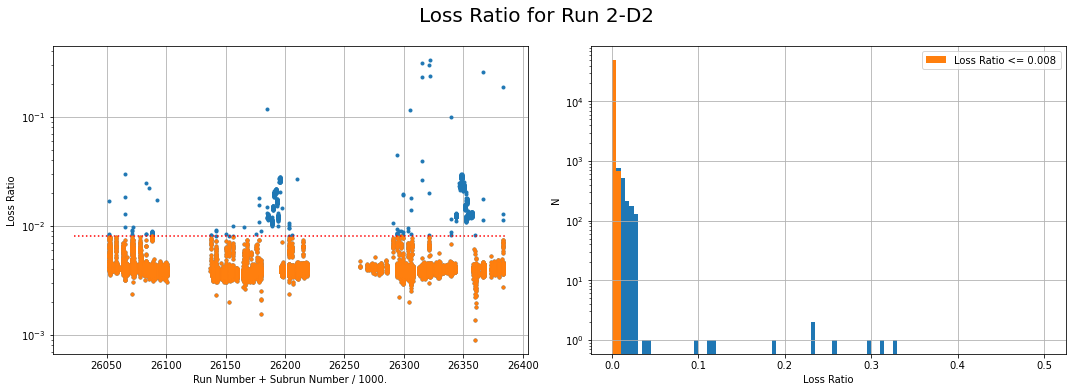

In [8]:
df = dfs['losses']

loss_ratio = 0.008

print("lossRatio <= ",loss_ratio)

df_cut = df.loc[df[2] <= loss_ratio]
dfs_cut['losses'] = df_cut

#      run  | subrun | lossratio  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2], ".")
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [loss_ratio, loss_ratio], ":", color='red')

ax[0].set_yscale("log")
ax[1].hist(df[2],bins=100,range=(0,.5))
ax[1].hist(df_cut[2],bins=100,range=(0,.5),label=("Loss Ratio <= "+str(loss_ratio)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("Loss Ratio for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("Loss Ratio")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"Loss Ratio")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio.png", bbox_inches='tight')

plt.show()

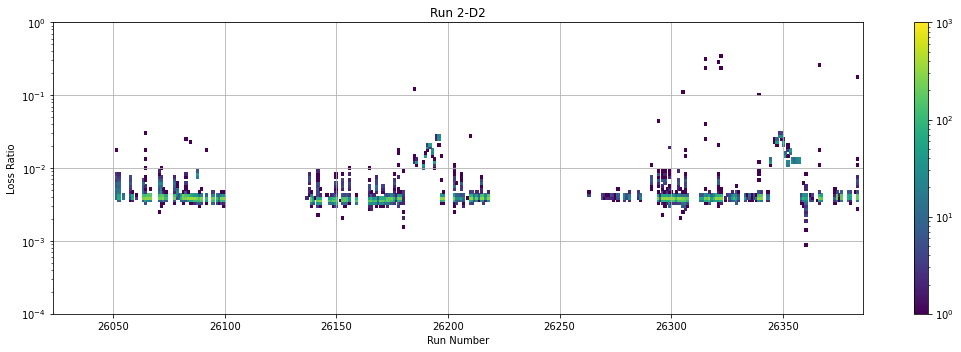

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2

logbins = [ np.linspace(runstart, runend, runend-runstart), 
            np.logspace(-4,0,100)
          ]

plt.hist2d(df[0], df[2], bins=logbins,
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25970, 25980)

plt.colorbar()
plt.yscale("log")
ax.set_xlabel("Run Number")
ax.set_ylabel("Loss Ratio")
plt.title(dataset)
plt.tight_layout()
plt.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio_hist.png", bbox_inches='tight')

plt.show()

---

# Now load global cut information

### Begin with quad cuts

In [10]:
df_quad_bad = pandas.read_csv("./data/Run2_global/quad_cut_run2.txt", header=None, delimiter=" ")
df_quad_bad = df_quad_bad.loc[df_quad_bad[0] > runstart].loc[df_quad_bad[0] < runend]
df_quad_bad.head()

,0,1
25995,26024,0
25996,26024,1
25997,26024,2
25998,26024,3
25999,26024,4


### This dataframe is all of the *bad* cuts, so we need to invert it to make the format compatable with the rest

In [11]:
print(runstart, runend)

26023 26386


In [12]:
ding = []
for run in range(runstart, runend+1, 1):
    for subrun in range(500):
        ding.append([run,subrun])
df_quad = pandas.DataFrame(ding)#, dtype=int)
df_quad.head()

,0,1
0,26023,0
1,26023,1
2,26023,2
3,26023,3
4,26023,4


In [13]:
# https://kanoki.org/2019/07/04/pandas-difference-between-two-dataframes/
df_quad = pandas.concat([df_quad,df_quad_bad]).drop_duplicates(keep=False)

In [14]:
dfs_cut['quad'] = df_quad

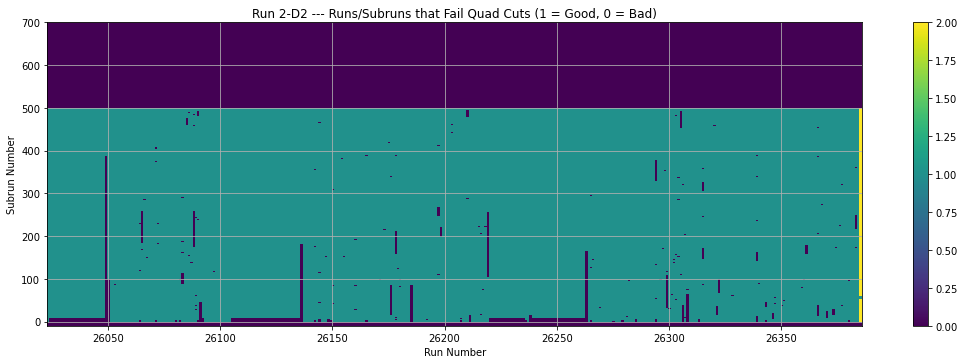

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist2d(df_quad[0], df_quad[1], range=((runstart, runend), (-10,700)),bins=((runend-runstart),710),
          #norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000)
          )
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Subrun Number")
plt.tight_layout()
plt.grid()
plt.title(dataset+" --- Runs/Subruns that Fail Quad Cuts (1 = Good, 0 = Bad)")
plt.savefig("./images/DQC_Images_"+dataset+"QuadCut_hist.png", bbox_inches='tight')

plt.show()

---

### And now the field info

In [16]:
field_path = "/home/jlab/g-2/dqc/data/Run2_global/field/"
field_files = [ x for x in os.listdir(field_path) if "_DQC.csv" in x]
print(field_files)

['6630_6672_DQC.csv', '6882_6935_DQC.csv', '6780_6841_DQC.csv', '7255_7291_DQC.csv', '7152_7188_DQC.csv', '7677_7697_DQC.csv', '7844_7874_DQC.csv', '7190_7213_DQC.csv', '7034_7065_DQC.csv', '7124_7149_DQC.csv', '6845_6878_DQC.csv', '7217_7249_DQC.csv', '7082_7104_DQC.csv', '7520_7546_DQC.csv', '7479_7512_DQC.csv', '7434_7466_DQC.csv', '7610_7636_DQC.csv', '7394_7429_DQC.csv', '6944_6985_DQC.csv', '6992_7029_DQC.csv']


In [17]:
df_field = pandas.DataFrame()
for file in field_files:
    dfi= pandas.read_csv(field_path+file)
    #print(dfi.head())
    df_field = df_field.append(dfi, ignore_index=True)
    #break
df_field = df_field.loc[df_field['run'] > runstart].loc[df_field['run'] < runend]

dfs_cut['field'] = df_field.loc[df_field['field status'] ==  0]

In [18]:
df_field.head()

,run,subrun,field status
18489,26260,3,16
18490,26260,4,0
18491,26260,5,0
18492,26260,6,0
18493,26260,7,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcad8eeed90>]],
      dtype=object)

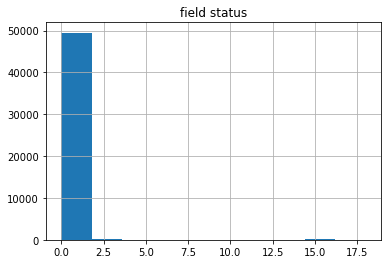

In [19]:
df_field.hist('field status')

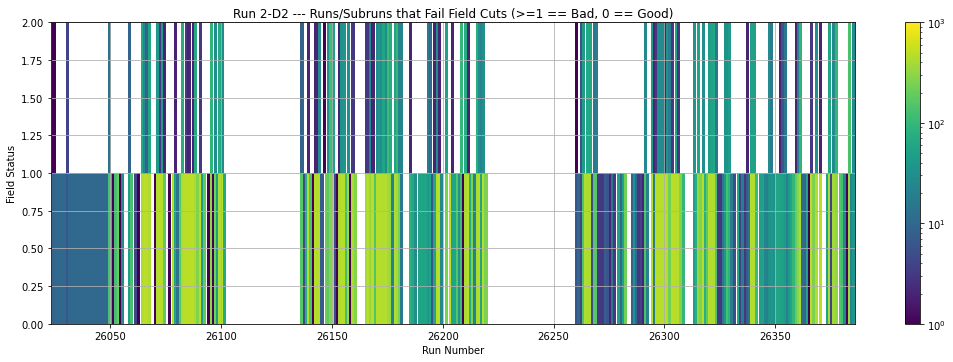

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist2d(df_field['run'], df_field['field status'], 
           #range=((runstart, runend), (-1,20)),bins=((runend-runstart),21),
           bins=[list(np.linspace(runstart,runend, runend-runstart+1)), [-1,0,1,10000] ],
           norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000)
          )
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Field Status")
plt.tight_layout()
plt.grid()
plt.title(dataset+" --- Runs/Subruns that Fail Field Cuts (>=1 == Bad, 0 == Good)")
plt.savefig("./images/DQC_Images_"+dataset+"FieldCut_hist.png", bbox_inches='tight')
plt.ylim(0,2)

plt.show()

---

### And now to create a list of known systematic run ranges

In [21]:
known_systematic_runs = [
    [26160,26167], # May06        Beam optimisation/wedges
    [26181,26196], # May07        Quad RF test-2
    [26342,26357], # May10        Quad RF test-3
    [26359,26360], #Beam Studies
]

---

# And now lets combine all of the data into one dataframe

In [22]:
#lets use the pandas inner join method; https://datacarpentry.org/python-ecology-lesson/05-merging-data/
for i, name in enumerate(dfs_cut):
    dfi = dfs_cut[name]
    print(name)
    print(dfi.head())
    
    for col in dfi.columns:
        dfi[str(col)+"_"+name] = dfi[col]
    
    #create unique id column for each run/subrun
    try:
        dfi['unique id'] = dfi[0]*1000 + dfi[1]
    except:
        dfi['unique id'] = dfi['run']*1000 + dfi['subrun']
        
    #combine them together using an inner join on the unique id
    if(i == 0):
        df_merged = dfi
    else:
        df_merged = pandas.merge(left=df_merged, right=dfi, left_on='unique id', right_on='unique id', suffixes=("", name))


df_merged.head()

ctags
         0    1      2           3    4
839  26052  108  52275  14728300.0   96
840  26052  109  55030  14707900.0   96
841  26052  110  64278  17116800.0  112
842  26052  111  54952  14741200.0   96
843  26052  112  56079  14979100.0   98
fillcuts
         0   1   2    3
791  26052  60  54  117
792  26052  61  51  105
793  26052  62  47  106
794  26052  63  61  122
795  26052  64  52  108
losses
       0  1    2
0  26025  0  0.0
1  26025  1  0.0
2  26025  2  0.0
3  26025  3  0.0
4  26025  4  0.0
quad
       0  1
0  26023  0
1  26023  1
2  26023  2
3  26023  3
4  26023  4
field
         run  subrun  field status
18490  26260       4             0
18491  26260       5             0
18492  26260       6             0
18493  26260       7             0
18494  26260       8             0


/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,0,1,2,3,4,0_ctags,1_ctags,2_ctags,3_ctags,4_ctags,...,0quad,1quad,0_quad,1_quad,run,subrun,field status,run_field,subrun_field,field status_field
0,26052,108,52275,14728300.0,96,26052,108,52275,14728300.0,96,...,26052,108,26052,108,26052,108,0,26052,108,0
1,26052,109,55030,14707900.0,96,26052,109,55030,14707900.0,96,...,26052,109,26052,109,26052,109,0,26052,109,0
2,26052,110,64278,17116800.0,112,26052,110,64278,17116800.0,112,...,26052,110,26052,110,26052,110,0,26052,110,0
3,26052,111,54952,14741200.0,96,26052,111,54952,14741200.0,96,...,26052,111,26052,111,26052,111,0,26052,111,0
4,26052,112,56079,14979100.0,98,26052,112,56079,14979100.0,98,...,26052,112,26052,112,26052,112,0,26052,112,0


In [23]:
df_merged.columns

Index([                 '0',                  '1',                  '2',
                        '3',                    4,            '0_ctags',
                  '1_ctags',            '2_ctags',            '3_ctags',
                  '4_ctags',          'unique id',          '0fillcuts',
                '1fillcuts',          '2fillcuts',          '3fillcuts',
               '0_fillcuts',         '1_fillcuts',         '2_fillcuts',
               '3_fillcuts',                  '0',                  '1',
                          2,           '0_losses',           '1_losses',
                 '2_losses',              '0quad',              '1quad',
                   '0_quad',             '1_quad',                'run',
                   'subrun',       'field status',          'run_field',
             'subrun_field', 'field status_field'],
      dtype='object')

---

# And now create versions of the above plots which pass all of the cuts

/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


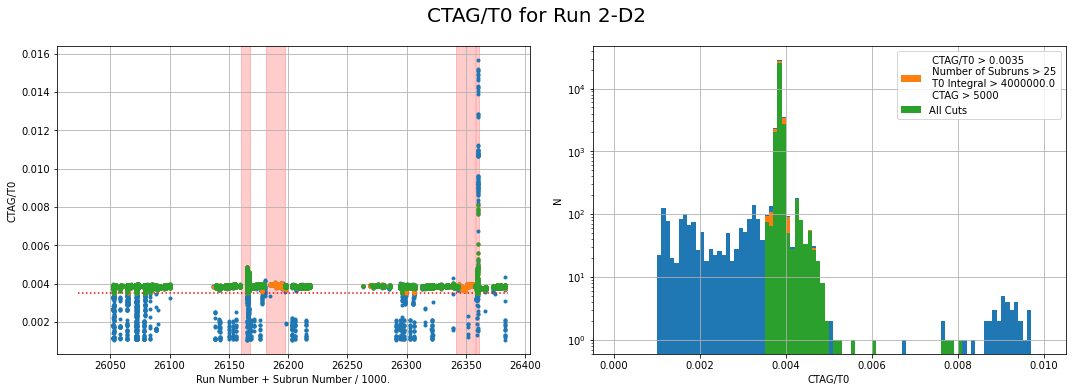

In [24]:
name = 'ctags'
df = dfs[name]
df_cut = dfs_cut[name]

#  run  | subrun | ctags |    t0val    | fills  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [ctagPerFillCut, ctagPerFillCut], ":", color='red')
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[0].plot(df_merged["0"+"_"+name]+df_merged["1"+"_"+name]/1000., df_merged["2_"+name]/df_merged["3"+"_"+name], ".")

rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 1000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])


ax[1].hist(df[2]/df[3],bins=100,range=(0,0.01))
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,0.01),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].hist(df_merged["2_"+name]/df_merged["3_"+name],bins=100,range=(0,0.01),label=("All Cuts"))

ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/T0 for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/T0")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/T0")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_CTAG_over_T0_allCuts.png", bbox_inches='tight')

# ax[0].set_xlim(26357, 26361)

plt.show()

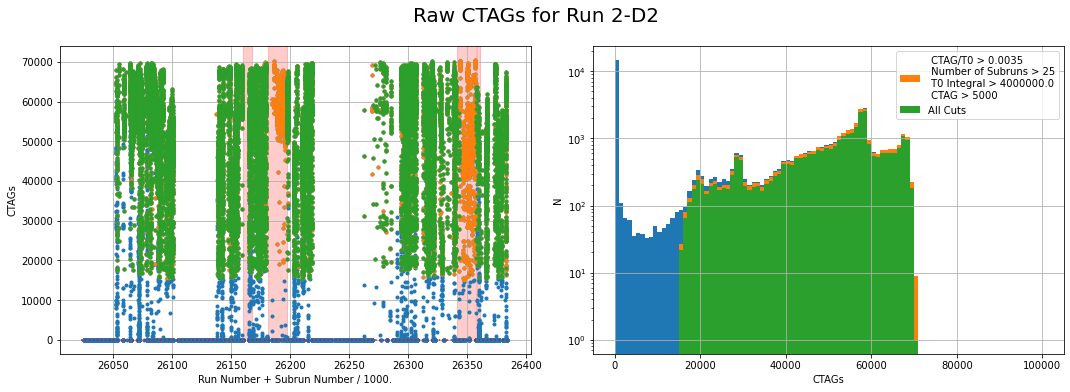

In [25]:
name = 'ctags'
df = dfs[name]
df_cut = dfs_cut[name]

#  run  | subrun | ctags |    t0val    | fills  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [ctagPerFillCut, ctagPerFillCut], ":", color='red')
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2], ".")
ax[0].plot(df_merged["0"+"_"+name]+df_merged["1"+"_"+name]/1000., df_merged["2_"+name], ".")

rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 100000000000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])

ax[1].hist(df[2],bins=100,range=(0,100000))
ax[1].hist(df_cut[2],bins=100,range=(0,100000),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].hist(df_merged["2_"+name],bins=100,range=(0,100000),label=("All Cuts"))

ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("Raw CTAGs for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAGs")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAGs")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_CTAG_Raw_allCuts.png", bbox_inches='tight')

#ax[0].set_xlim(26357, 26361)

plt.show()

/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


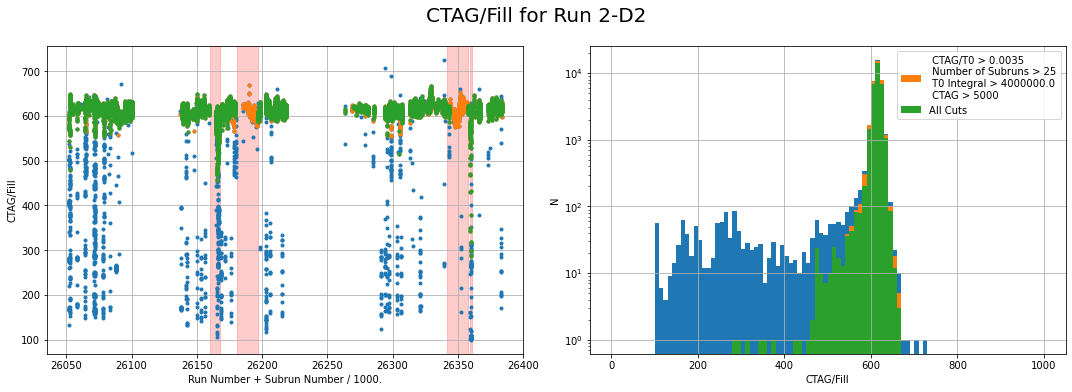

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[4], ".")
ax[1].hist(df[2]/df[4],bins=100,range=(0,1000))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[4], ".")
ax[1].hist(df_cut[2]/df_cut[4],bins=100,range=(0,1000),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[0].plot(df_merged["0_"+name]+df_merged["1_"+name]/1000., df_merged["2_"+name]/df_merged["4_"+name], ".")

rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 1000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])


ax[1].hist(df_merged["2_"+name]/df_merged["4_"+name],bins=100,range=(0,1000),label=("All Cuts"))

ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/Fill for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/Fill")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/Fill")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill_allCuts.png", bbox_inches='tight')

#ax[0].set_xlim(26150,26170)

plt.show()

/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


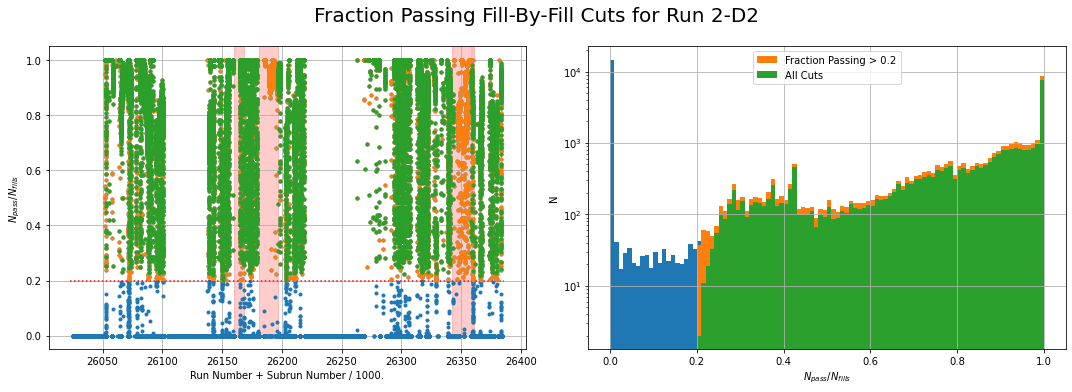

In [27]:
name = 'fillcuts'
df = dfs[name]
df_cut = dfs_cut[name]

#    run  | subrun | fills | fills   
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [fraction_passing, fraction_passing], ":", color='red')

ax[1].hist(df[2]/df[3],bins=100,range=(0,1))

ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")


rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 1000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])


ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,1),label=("Fraction Passing > "+str(fraction_passing)))

ax[0].plot(df_merged["0_"+name]+df_merged["1_"+name]/1000., df_merged["2_"+name]/df_merged["3_"+name], ".")
ax[1].hist(df_merged["2_"+name]/df_merged["3_"+name],bins=100,range=(0,1),label=("All Cuts"))

ax[1].legend()

ax[1].set_yscale("log")
plt.suptitle("Fraction Passing Fill-By-Fill Cuts for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel(r"$N_{pass}/N_{fills}$")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"$N_{pass}/N_{fills}$")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts_allCuts.png", bbox_inches='tight')

plt.show()

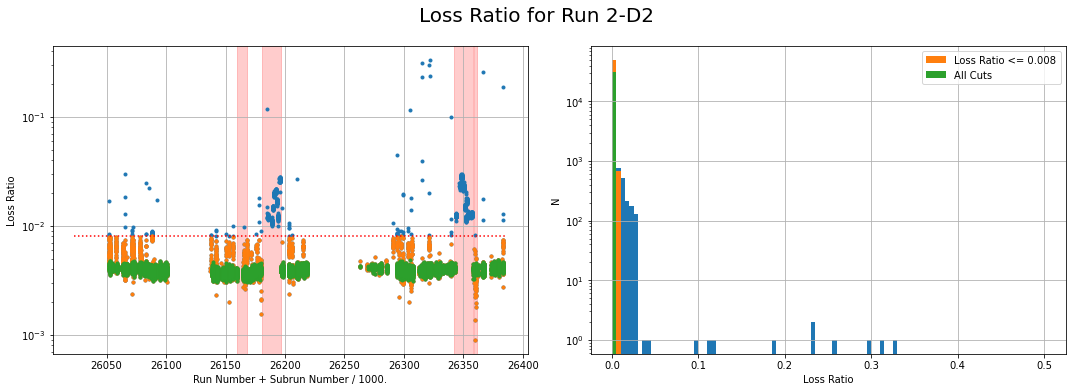

In [28]:
name = 'losses'
df = dfs[name]
df_cut = dfs_cut[name]

#      run  | subrun | lossratio  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2], ".")
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2], ".")
ax[0].plot(df_merged["0_"+name]+df_merged["1_"+name]/1000., df_merged["2_"+name], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [loss_ratio, loss_ratio], ":", color='red')
ax[0].set_yscale("log")

rect_patches = []
for i, (runstart, runend) in enumerate(known_systematic_runs):
    rect_patches.append( matplotlib.patches.Rectangle((runstart,0), runend-runstart+1, 1000, color='red', alpha=0.2) )
    ax[0].add_artist(rect_patches[i])

ax[1].hist(df[2],bins=100,range=(0,.5))
ax[1].hist(df_cut[2],bins=100,range=(0,.5),label=("Loss Ratio <= "+str(loss_ratio)))
ax[1].hist(df_merged["2_"+name],bins=100,range=(0,.5),label=("All Cuts"))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("Loss Ratio for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("Loss Ratio")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"Loss Ratio")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio_allCuts.png", bbox_inches='tight')

plt.show()